In [36]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.layers import *
from keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import warnings
warnings.filterwarnings('ignore')

In [37]:
data_path = '/Users/harshrajsahu/Brain_tumor_classify/brain_t_ds'
image_classes = os.listdir(data_path)
print(image_classes)


['pituitary', 'notumor', 'glioma', 'meningioma']


In [38]:
def plot_images(image_classes):
    plt.figure(figsize=(4,20))
    for i , category in enumerate(image_classes):
        image_path=data_path + '/' + category
        images_in_folder = os.listdir(image_path)
        first_image=images_in_folder[0]

        first_image_path=image_path + '/' + first_image
        img=image.load_img(first_image_path)
        img_array = image.img_to_array(img)/255
        plt.subplot(4,4,i+1)
        plt.imshow(img_array)
        plt.title(category)
        plt.axis('off')
    plt.show()

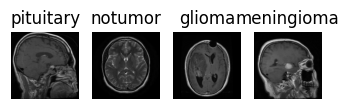

In [39]:
plot_images(image_classes)

In [40]:
image_generator=ImageDataGenerator(rescale = 1/255, validation_split=0.3)

In [41]:
train_data=image_generator.flow_from_directory('/Users/harshrajsahu/Brain_tumor_classify/brain_t_ds',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               shuffle=True,
                                               subset='training')

Found 5008 images belonging to 4 classes.


In [42]:
test_data=image_generator.flow_from_directory('/Users/harshrajsahu/Brain_tumor_classify/brain_t_ds',
                                             target_size=(224,224),
                                             batch_size=1,
                                             class_mode='categorical',
                                             shuffle=True,
                                             subset='validation')

Found 2145 images belonging to 4 classes.


In [43]:
model = Sequential()

In [44]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[224, 224, 3]))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    25,690,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,710,148 (98.08 MB)

 Trainable params: 25,710,148 (98.08 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model_history=model.fit(train_data,epochs=6,validation_data=test_data)

Epoch 1/6
157/157 ━━━━━━━━━━━━━━━━━━━━ 90s 571ms/step - accuracy: 0.5434 - loss: 1.7443 - val_accuracy: 0.7203 - val_loss: 0.6081
Epoch 2/6
157/157 ━━━━━━━━━━━━━━━━━━━━ 97s 619ms/step - accuracy: 0.8191 - loss: 0.4657 - val_accuracy: 0.7832 - val_loss: 0.4627
Epoch 3/6
157/157 ━━━━━━━━━━━━━━━━━━━━ 97s 617ms/step - accuracy: 0.8866 - loss: 0.2800 - val_accuracy: 0.8979 - val_loss: 0.2907
Epoch 4/6
157/157 ━━━━━━━━━━━━━━━━━━━━ 98s 625ms/step - accuracy: 0.9212 - loss: 0.2016 - val_accuracy: 0.9072 - val_loss: 0.2687
Epoch 5/6
157/157 ━━━━━━━━━━━━━━━━━━━━ 98s 624ms/step - accuracy: 0.9403 - loss: 0.1556 - val_accuracy: 0.9282 - val_loss: 0.2238
Epoch 6/6
157/157 ━━━━━━━━━━━━━━━━━━━━ 99s 631ms/step - accuracy: 0.9570 - loss: 0.1323 - val_accuracy: 0.9343 - val_loss: 0.1998


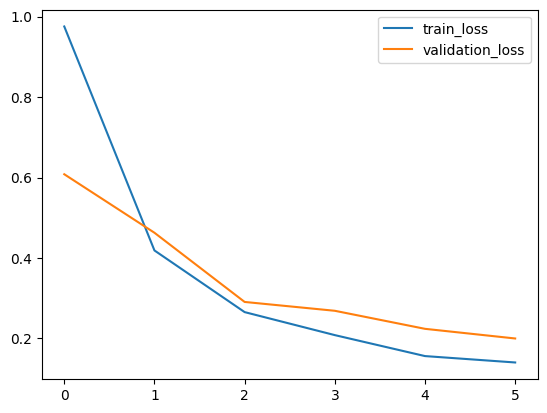

In [48]:
plt.plot(model_history.history['loss'],label='train_loss')
plt.plot(model_history.history['val_loss'],label='validation_loss')
plt.legend()
plt.show()

In [49]:
model.evaluate(train_data)

157/157 ━━━━━━━━━━━━━━━━━━━━ 19s 118ms/step - accuracy: 0.9794 - loss: 0.0643


[0.06332730501890182, 0.9780351519584656]

In [50]:
model.evaluate(test_data)

2145/2145 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.9308 - loss: 0.1989


[0.19982832670211792, 0.9342657327651978]

In [53]:
model.save('My_model.keras')